# Exploratory Data Analysis

This notebook explores the aggregated data in **d1-basketball-data-93-23.csv** file to determine how the predictive model will be built.  Each row represents the statistical data and rankings for a Division I school's basketball team for a particular season ranging from the 1992-93 to 2022-23 season.  Approximately 97% of all Division I basketball teams since the 1992-93 season are included in this dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Shape and types of data

There are thirty one features and 9695 observations.  A glossary of the numeric features is available at [https://www.sports-reference.com/](https://www.sports-reference.com/).  Features "Conf_Rk" and "region_seed" are ordinal numeric features.  Features "qual_for_ncaa", "final_four" and "ncaa_champ" are boolean variables indicating if the team qualified for the NCAA post-season tournament, the final four, and if they won the tournament respectively.

In [2]:
raw_df = pd.read_csv("d1-basketball-data-93-23.csv")
raw_df.drop("Unnamed: 0", inplace=True, axis=1)
raw_df.head()

,School,G,W,L,W-L%,SRS,SOS,W.1,L.1,W.2,...,eFG%,TOV%,FT/FGA,Conf_Rk,Conf,region_seed,qual_for_ncaa,final_four,ncaa_champ,season
0,Air Force,28,9,19,0.321,-7.45,2.05,3.0,15.0,3.0,...,0.458,17.4,0.263,10.0,WAC,-1.0,False,False,False,1993
1,Akron,26,8,18,0.308,-10.69,-5.06,3.0,15.0,4.0,...,0.488,18.4,0.241,10.0,MAC,-1.0,False,False,False,1993
2,Alabama,29,16,13,0.552,9.66,7.83,7.0,9.0,11.0,...,0.513,19.4,0.271,10.0,SEC,-1.0,False,False,False,1993
3,Alabama State,27,14,13,0.519,-8.49,-9.70,9.0,5.0,7.0,...,0.518,20.7,0.305,3.0,SWAC,-1.0,False,False,False,1993
4,Alcorn State,27,7,20,0.259,-11.04,-4.58,5.0,9.0,3.0,...,0.487,19.7,0.188,7.0,SWAC,-1.0,False,False,False,1993


In [3]:
raw_df.shape

(9695, 31)

In [4]:
raw_df.dtypes

School            object
G                  int64
W                  int64
L                  int64
W-L%             float64
SRS              float64
SOS              float64
W.1              float64
L.1              float64
W.2              float64
L.2              float64
W.3              float64
L.3              float64
Tm.              float64
Opp.             float64
FTr              float64
3PAr             float64
TS%              float64
TRB%             float64
AST%             float64
BLK%             float64
eFG%             float64
TOV%             float64
FT/FGA           float64
Conf_Rk          float64
Conf              object
region_seed      float64
qual_for_ncaa       bool
final_four          bool
ncaa_champ          bool
season             int64
dtype: object

## Distribution of features

All numeric features are plotted as histograms below.  The visual under that displays histograms for the numeric features for teams that qualified for the the post season tournament.  While some features appear to posses a normal distribution (for example, "W.2" and "eFG%"), many resemble something that looks almost normal but skewed to the left or right (for example, "Opp.", "FT/FGA" and "G").  Some features were not normally distributed at all (for example, "SOS", "L.2", and "W.3").  The distribution of features of all the data generally matches the distribution of features for qualifying teams only, but more features appear more normal and less skewed.  Additionally, the variances across the qualifying teams' numeric features are less when compared to the variances of the feature distributions of all teams.

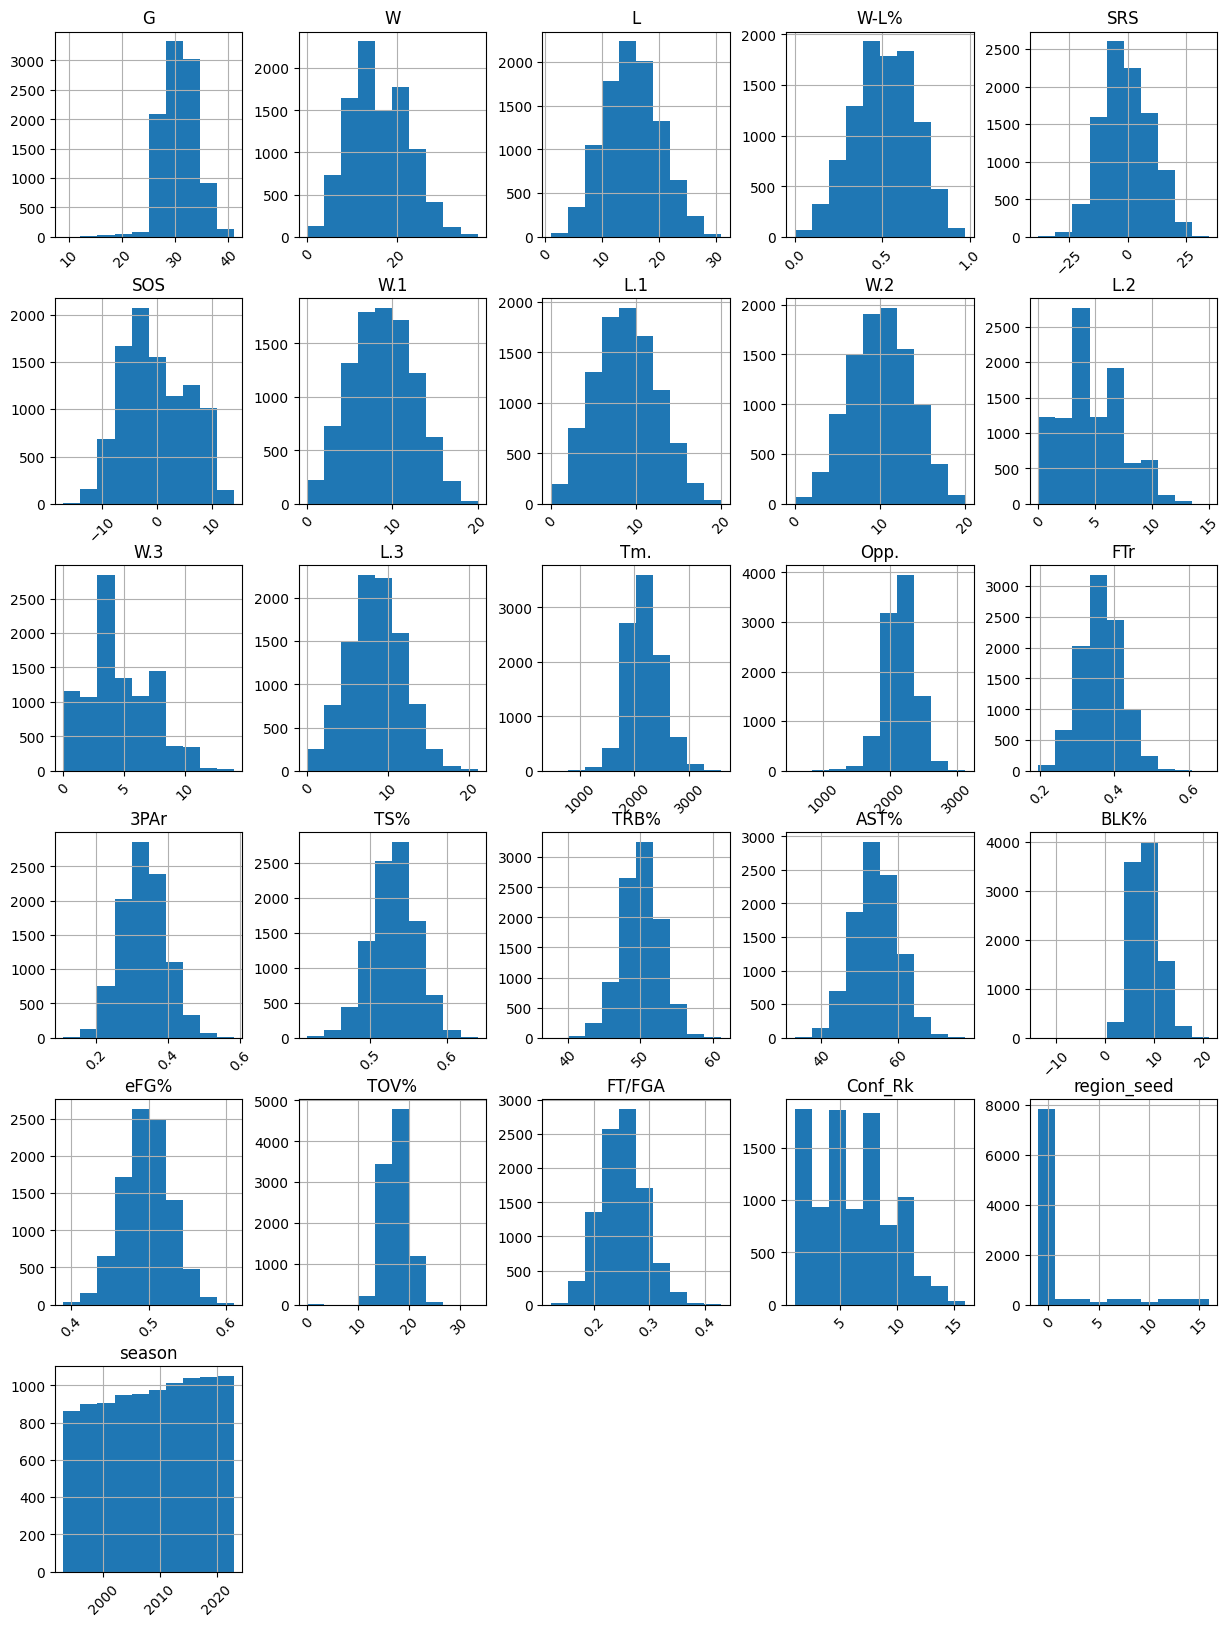

In [5]:
raw_df.hist(figsize=(15,20), xrot=45)
plt.show()

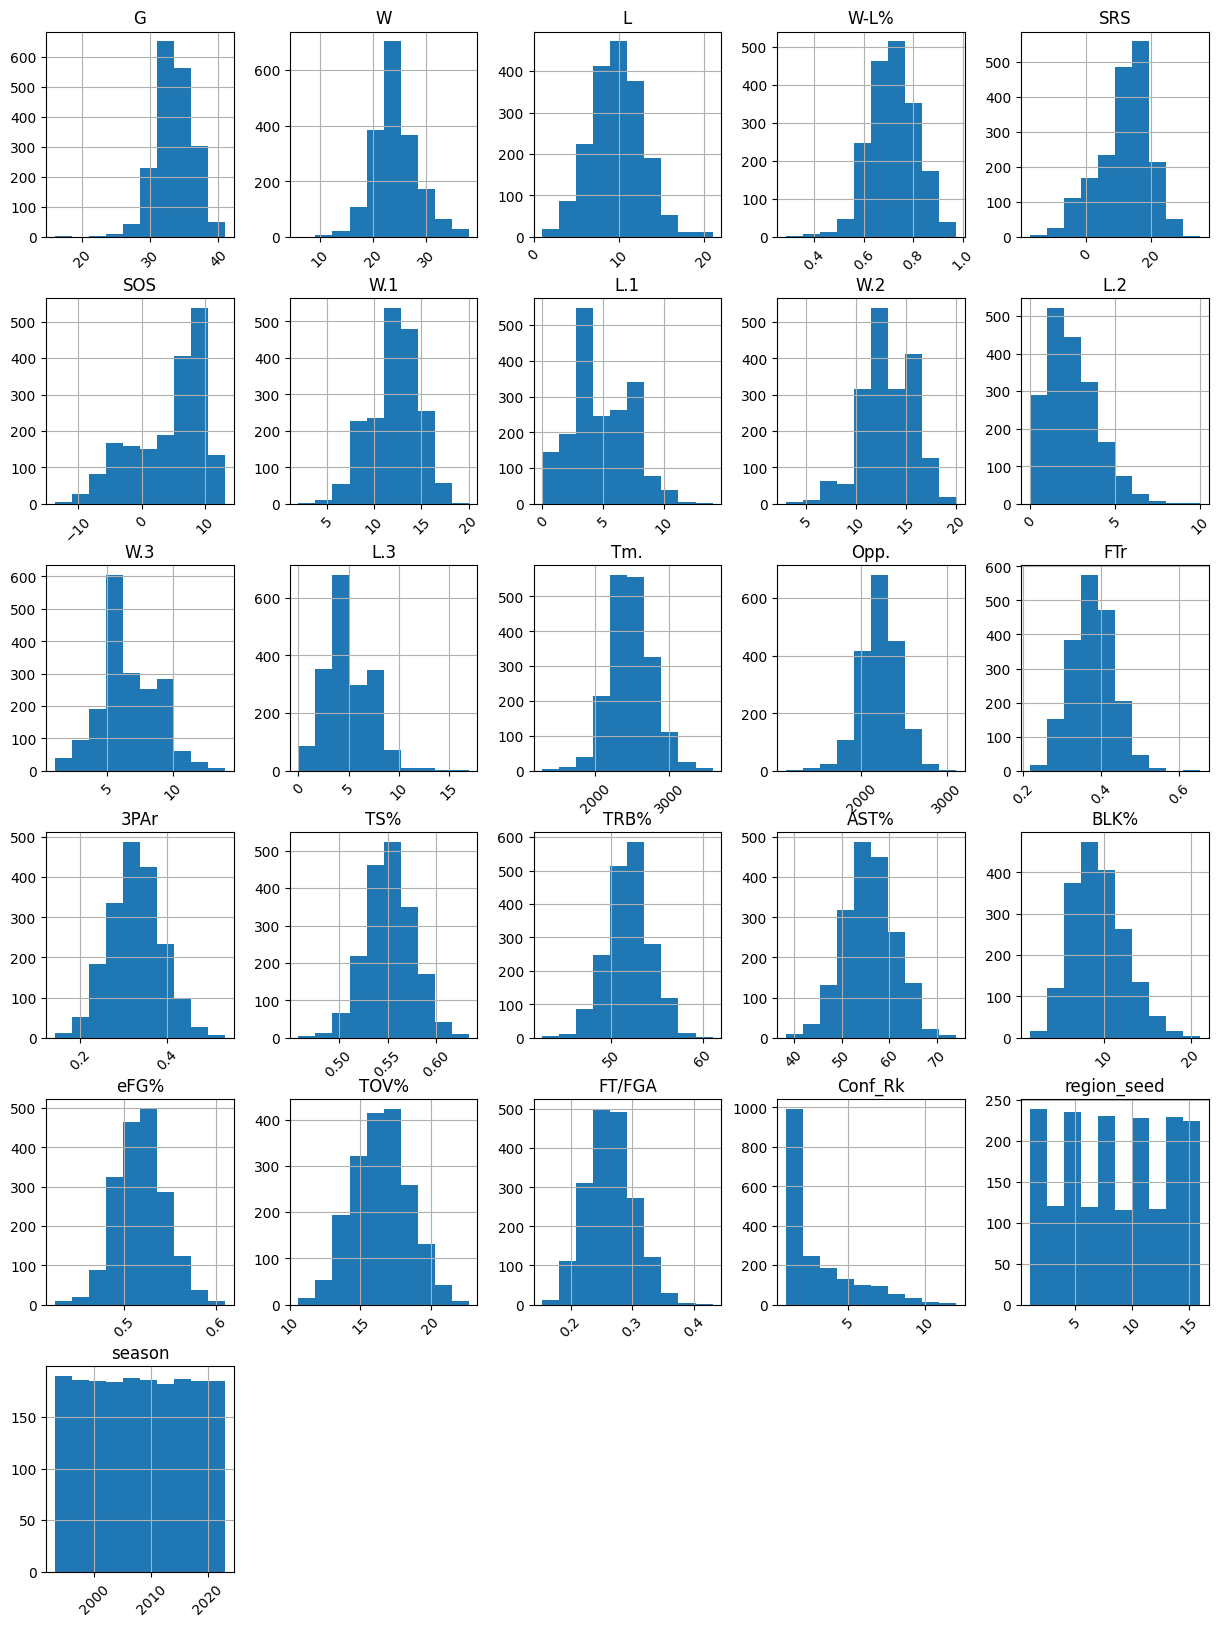

In [6]:
raw_df.loc[raw_df["qual_for_ncaa"]==True].hist(figsize=(15,20), xrot=45)
plt.show()

## Statistical summaries

From the 1992-93 to the 2022-23 season, there are 363 distinct schools from 44 conferences that played Division I college basketball.  Two hundred seventy five of the 363 school qualified for the NCAA post season tournament at least once.  Fourty one of 44 conferences have represented at the tournament at least once.  There is at least one school that qualifies for the post season tournament every year, specifically Kansas University.  There is at least one school that has never qualified, specifically Saint Francis University.

In [7]:
raw_df.describe()

,G,W,L,W-L%,SRS,SOS,W.1,L.1,W.2,L.2,...,TS%,TRB%,AST%,BLK%,eFG%,TOV%,FT/FGA,Conf_Rk,region_seed,season
count,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,...,9695.000000,9695.000000,9695.000000,9695.000000,9695.00000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000
mean,30.818773,16.004332,14.814028,0.510968,-0.561509,-0.274133,8.400619,8.349046,9.662713,4.512120,...,0.530812,50.086787,54.085312,8.135554,0.49683,17.505549,0.252133,5.881382,0.804126,2008.167096
std,3.139008,6.387557,4.908464,0.174930,10.321968,5.784272,3.672199,3.661971,3.581511,2.627133,...,0.029331,2.672792,5.733493,2.831087,0.03063,2.271522,0.039632,3.300374,4.220029,8.786356
min,9.000000,0.000000,1.000000,0.000000,-38.170000,-16.950000,0.000000,0.000000,0.000000,0.000000,...,0.418000,37.700000,33.000000,-13.700000,0.39000,0.000000,0.123000,1.000000,-1.000000,1993.000000
25%,29.000000,11.000000,11.000000,0.387000,-8.005000,-4.790000,6.000000,6.000000,7.000000,2.000000,...,0.511000,48.400000,50.200000,6.000000,0.47600,16.000000,0.225000,3.000000,-1.000000,2001.000000
50%,31.000000,16.000000,15.000000,0.516000,-1.300000,-1.140000,8.000000,8.000000,10.000000,4.000000,...,0.531000,50.200000,54.000000,7.900000,0.49700,17.400000,0.251000,6.000000,-1.000000,2008.000000
75%,33.000000,20.000000,18.000000,0.636000,6.865000,4.600000,11.000000,11.000000,12.000000,6.000000,...,0.550000,51.900000,58.000000,10.000000,0.51700,19.000000,0.278000,8.000000,-1.000000,2016.000000
max,41.000000,38.000000,31.000000,0.974000,34.790000,13.890000,20.000000,20.000000,20.000000,15.000000,...,0.639000,61.100000,77.500000,21.100000,0.61000,33.500000,0.430000,16.000000,16.000000,2023.000000


In [8]:
qual_df = raw_df.loc[raw_df["qual_for_ncaa"]==True]
non_qual_df = raw_df.loc[raw_df["qual_for_ncaa"]==False]

print("All schools, every season:")
print(raw_df.describe(include='object'), "\n")
print("All NCAA tournament qualifying schools:")
print(qual_df.describe(include='object'), "\n")
print("All non- NCAA tournament qualifying schools:")
print(non_qual_df.describe(include='object'), "\n")

All schools, every season:
                School      Conf
count             9695      9695
unique             363        44
top     South Carolina  Big East
freq                32       382 

All NCAA tournament qualifying schools:
        School     Conf
count     1858     1858
unique     276       41
top     Kansas  Big Ten
freq        30      178 

All non- NCAA tournament qualifying schools:
         School  Conf
count      7837  7837
unique      362    44
top     Stetson   MAC
freq         30   323 



## Conferences with the most qualifying teams

As seen in the first pie chart below, teams are fairly evenly distributed throughout the different conferences with the exception of several smaller ones.  The conferences most represented in the NCAA post-season tournament are the Big Ten, SEC, ACC, Big East, and Big 12.

In [9]:
grouped_df = raw_df[["Conf", "season"]].groupby("Conf").count().sort_values("season", 
                                                                                  ascending=False)
grouped_df.head(10)

,season
Conf,
Big East,382
A-10,381
SEC,381
Big Ten,357
MAC,356
ACC,350
CUSA,346
Sun Belt,336
Southland,334


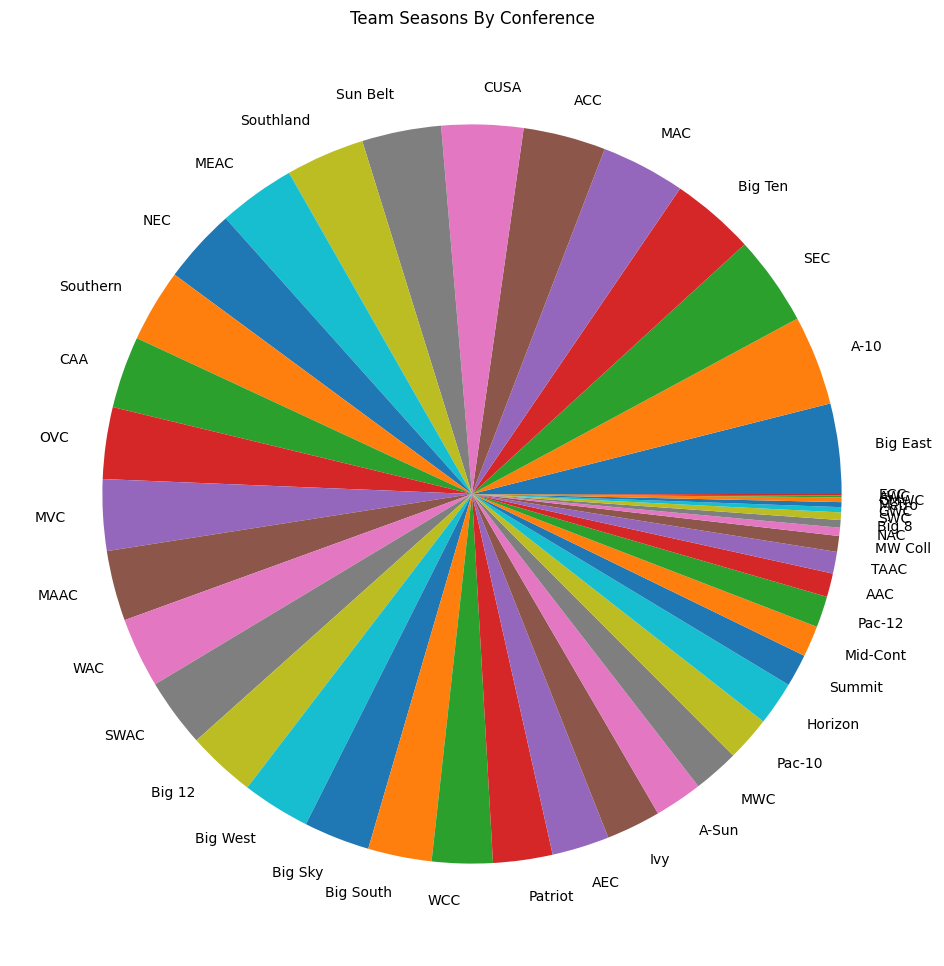

In [10]:
plt.figure(figsize=(12,12))
plt.title("Team Seasons By Conference")
plt.pie(grouped_df['season'], labels=grouped_df.index)
plt.show()

In [11]:
grouped_qual_df = qual_df[["Conf", "season"]].groupby("Conf").count().sort_values("season", 
                                                                                  ascending=False)
grouped_qual_df.head(10)


,season
Conf,
Big Ten,178
Big East,173
SEC,164
ACC,164
Big 12,151
A-10,82
Pac-10,77
CUSA,57
MVC,51


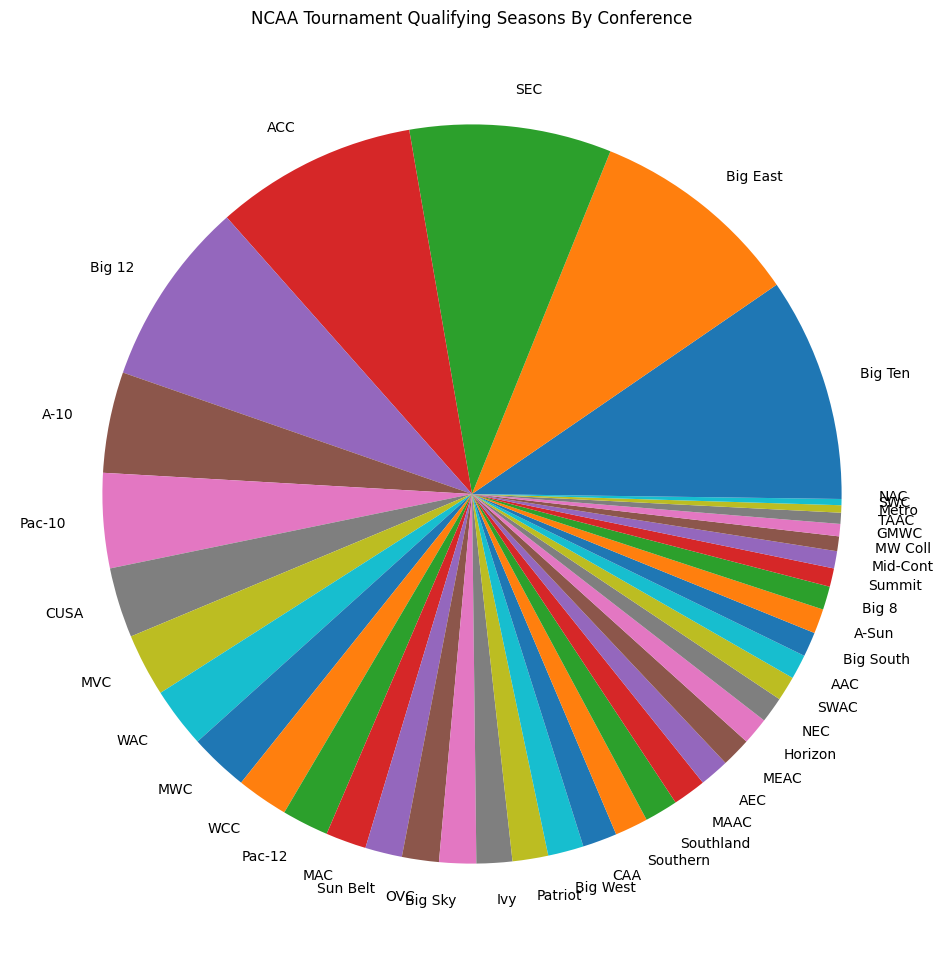

In [12]:
plt.figure(figsize=(12,12))
plt.title("NCAA Tournament Qualifying Seasons By Conference")
plt.pie(grouped_qual_df['season'], labels=grouped_qual_df.index)
plt.show()

## Comparison of feature distributions

The boxplots and datatables below compare the feature distributions of the qualifying and non-qualifying teams.  The center of the data for each feature is higher in the qualifying teams (except in features related to losses and points scored against the team).  When grouped by qualifying and non-qualifying teams, the vast majority of distributions appear normal.  Additionally, the interquartile range tends to be small for the qualifying teams.  This suggests the variances of the feature distributions are less for the qualifying teams.  The datatables confirm that the variances of the feature distributions of qualifying teams is generally less than when compared to non-qualifying teams.

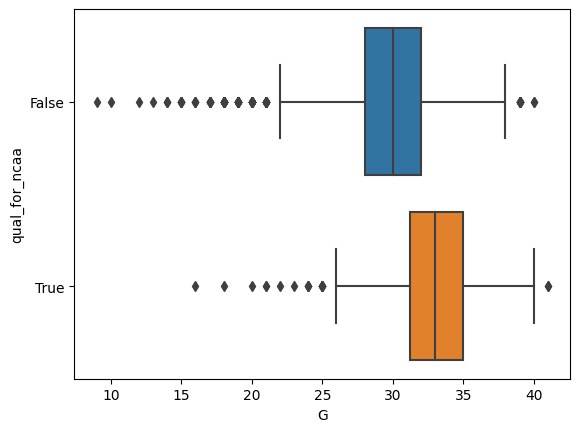

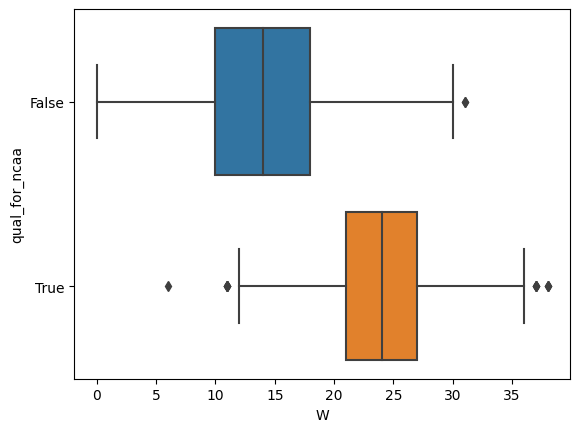

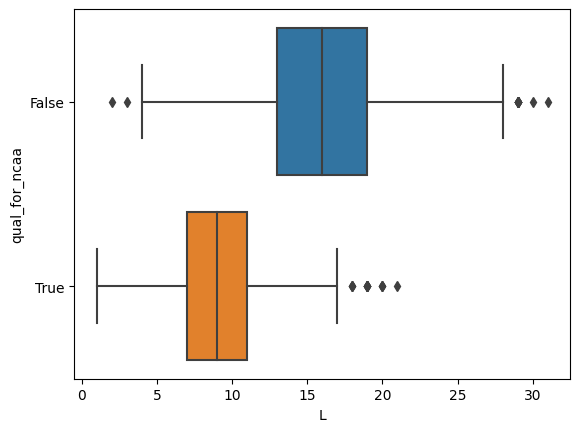

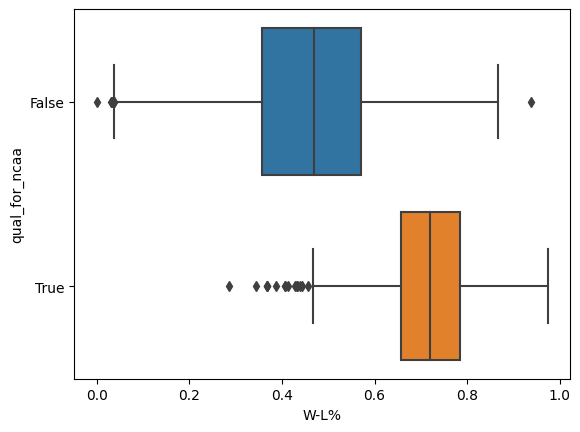

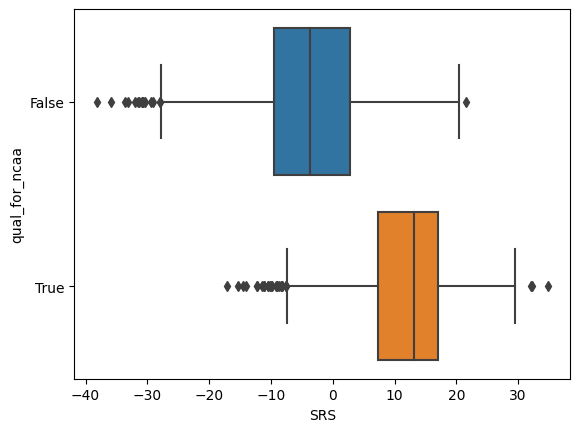

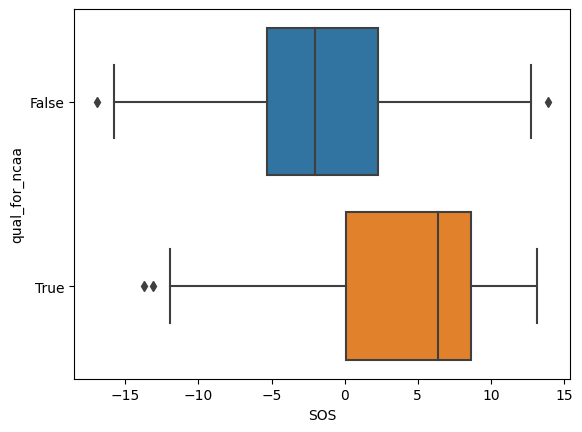

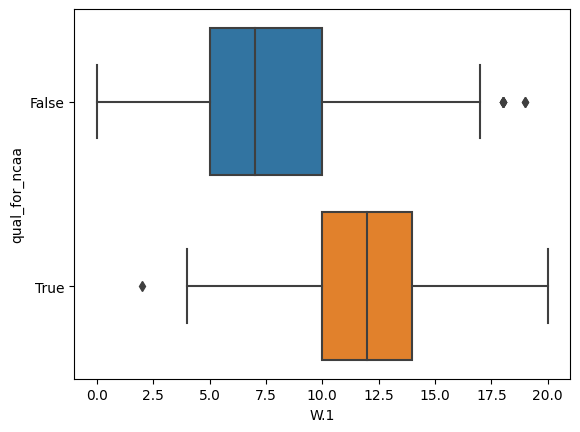

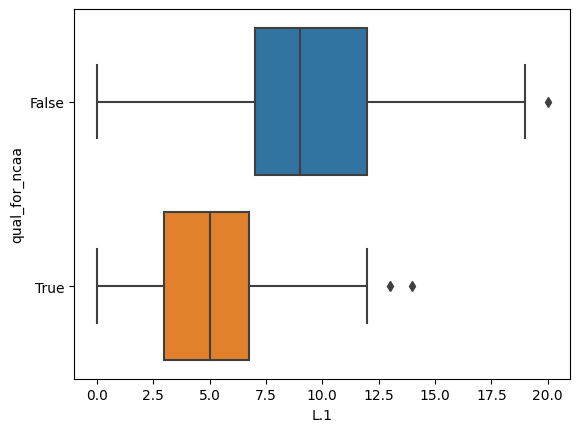

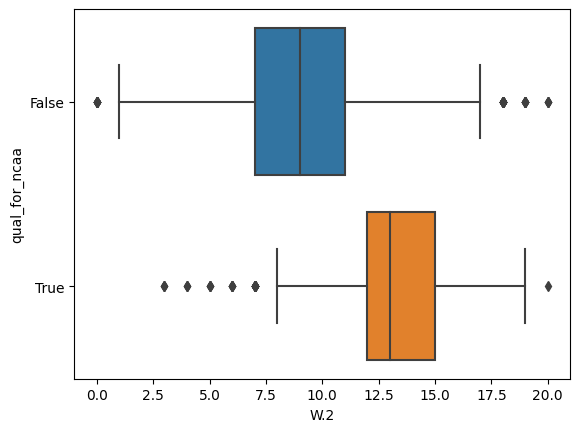

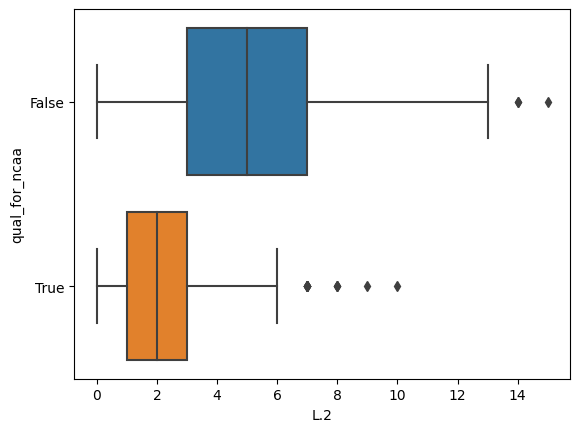

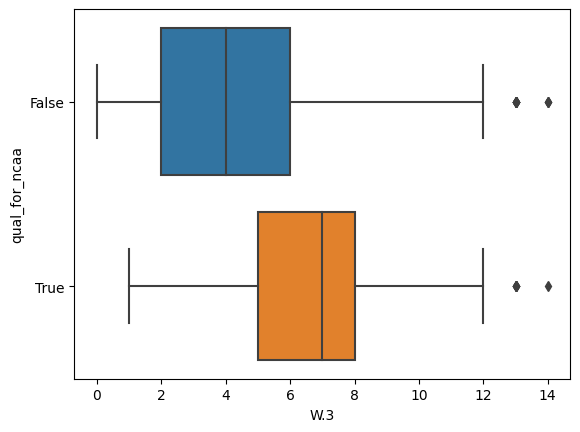

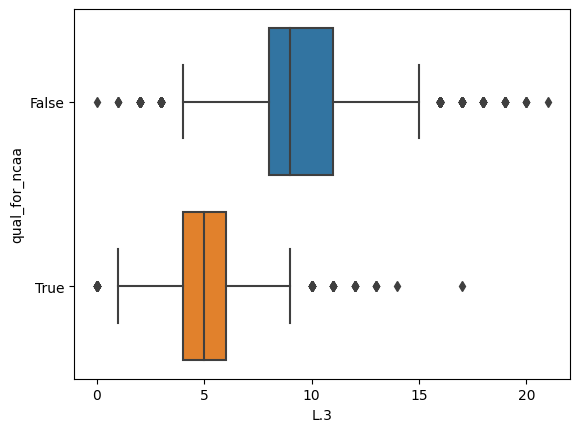

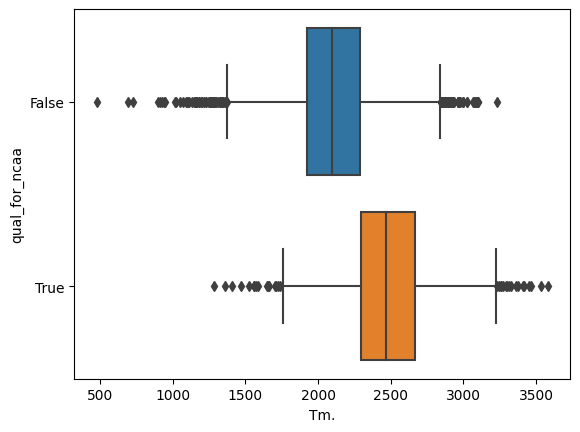

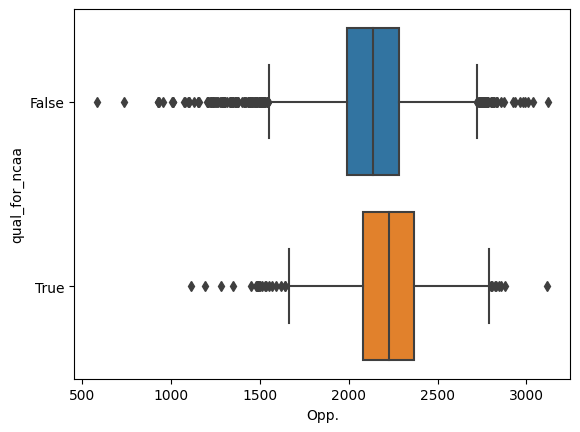

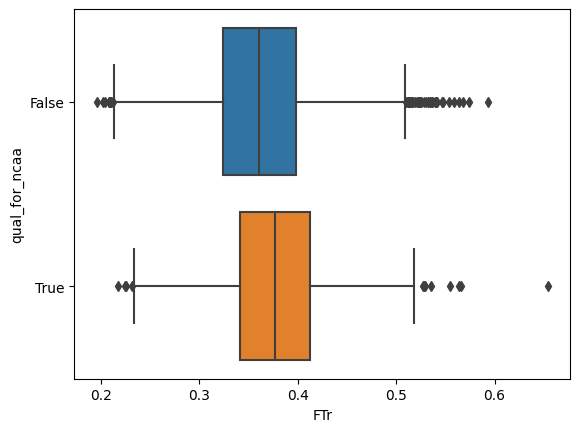

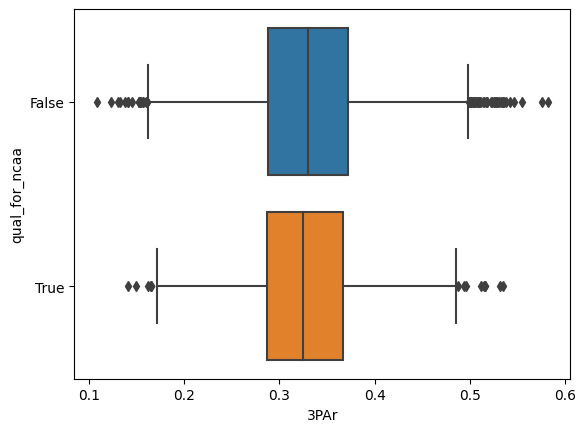

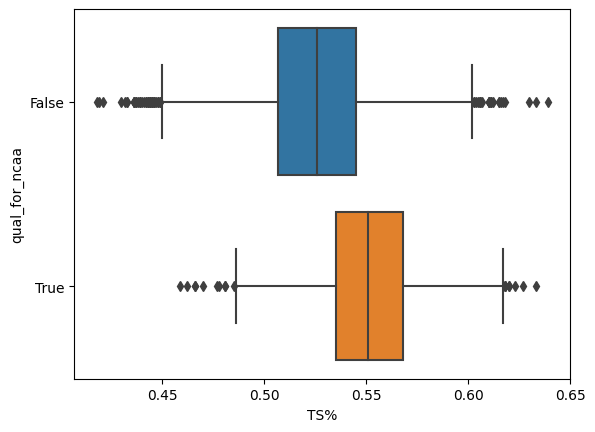

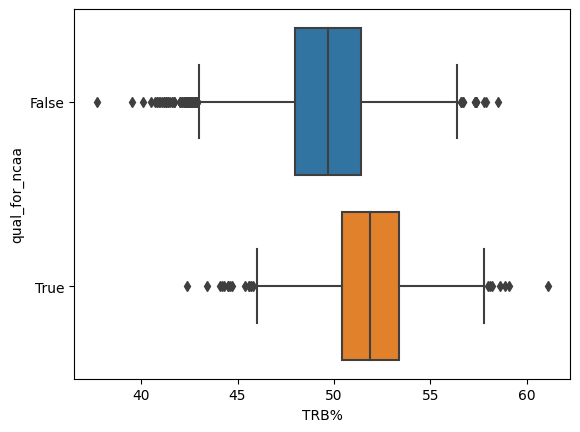

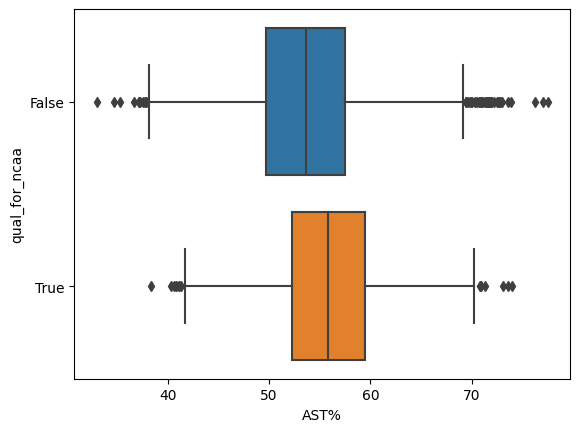

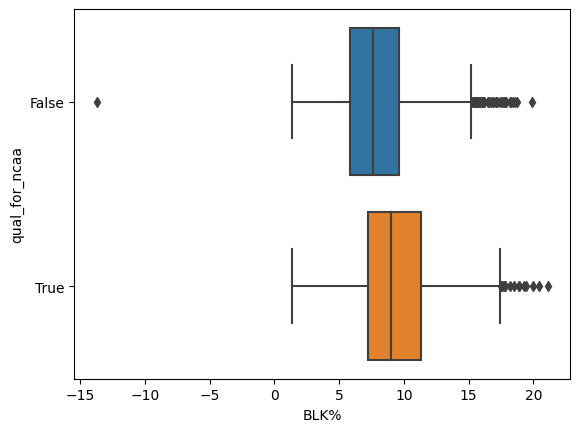

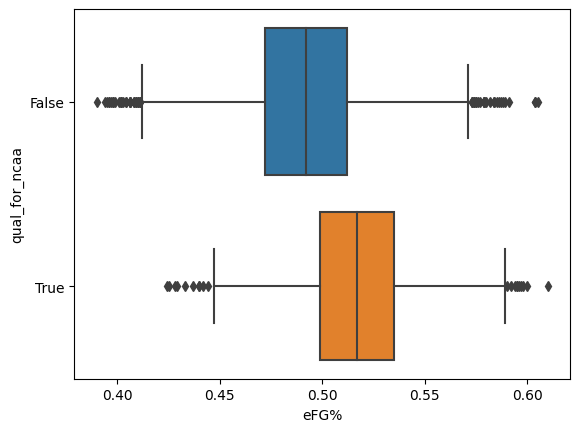

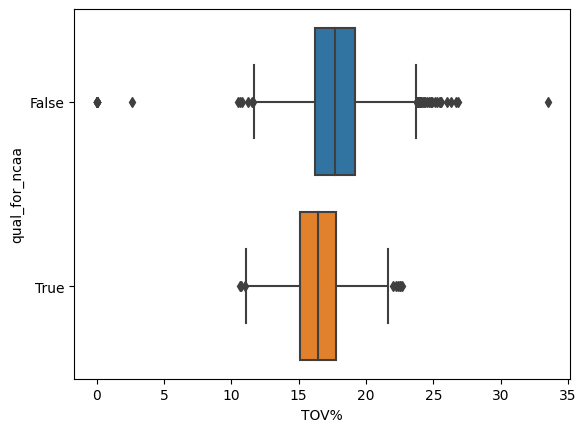

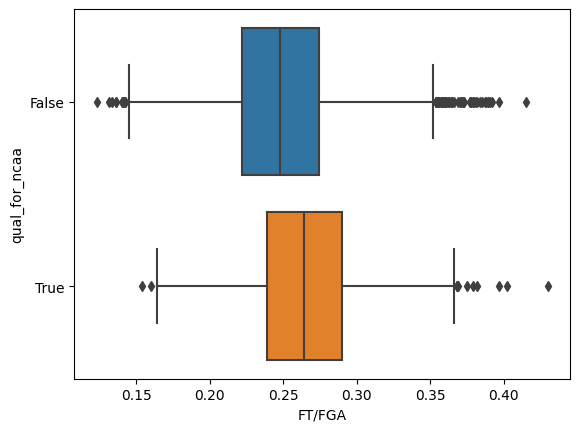

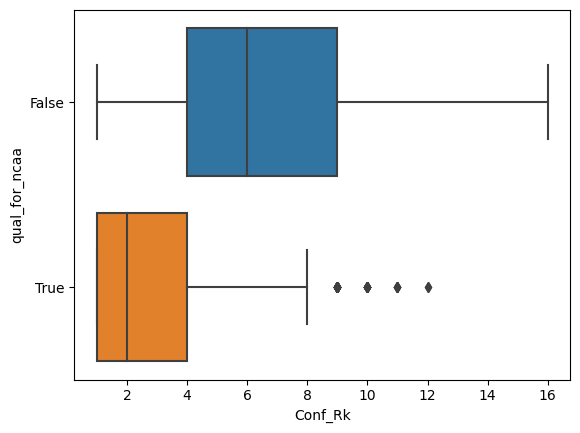

In [13]:
num_cols = raw_df.columns[1:25]

raw_df[num_cols]

for col in num_cols:
    # plt.figure()
    sns.boxplot(y=raw_df["qual_for_ncaa"].astype("str"), x=raw_df[col].astype("double"), data=raw_df)
    plt.show()

# sns.boxplot(y=raw_df["qual_for_ncaa"].astype("str"), x=raw_df[num_cols[23]].astype("double"), data=raw_df)

In [14]:
means_df = raw_df.groupby("qual_for_ncaa").mean()
means_df

,G,W,L,W-L%,SRS,SOS,W.1,L.1,W.2,L.2,...,AST%,BLK%,eFG%,TOV%,FT/FGA,Conf_Rk,region_seed,final_four,ncaa_champ,season
qual_for_ncaa,,,,,,,,,,,,,,,,,,,,,
False,30.229297,14.105780,16.123134,0.461724,-3.483172,-1.372481,7.543448,9.192676,8.832206,5.113309,...,53.653388,7.844826,0.491859,17.759717,0.249046,6.544596,-1.000000,0.000000,0.000000,2008.311344
True,33.305167,24.012379,9.292250,0.718676,11.761997,4.358671,12.016146,4.790635,13.165770,1.976319,...,55.907158,9.361841,0.517800,16.433477,0.265153,3.083961,8.413886,0.064586,0.016146,2007.558665


In [15]:
var_df = raw_df.groupby("qual_for_ncaa").var()
var_df

,G,W,L,W-L%,SRS,SOS,W.1,L.1,W.2,L.2,...,AST%,BLK%,eFG%,TOV%,FT/FGA,Conf_Rk,region_seed,final_four,ncaa_champ,season
qual_for_ncaa,,,,,,,,,,,,,,,,,,,,,
False,8.573884,27.392459,18.655969,0.023056,72.601849,27.729123,11.328287,11.490692,10.790754,6.120136,...,32.974201,7.304224,0.000865,5.143251,0.001542,9.949166,0.000000,0.000000,0.000000,76.909944
True,7.605800,18.027310,9.309805,0.009053,61.847236,31.083615,6.413309,5.843596,6.238526,2.244996,...,28.355151,9.157558,0.000703,3.809896,0.001485,5.192731,21.289565,0.060447,0.015894,78.007596


## Correlation heatmap

Heatmaps are used to provide a visual representation of the correlations between features in a dataset.  The red suggests a postive correlation, the blue suggests a negative correlation, dark colors suggest a stronger relationship, lighter colors suggest a weaker relationship.

The strongest correlations exist between related features (for example, wins, losses and win-loss percentage).  The features most strongly correlating with tournament qualification are "W" (overal wins), "W-L%" (percent of wins to losses), and "SRS" (Simple Rating System score).

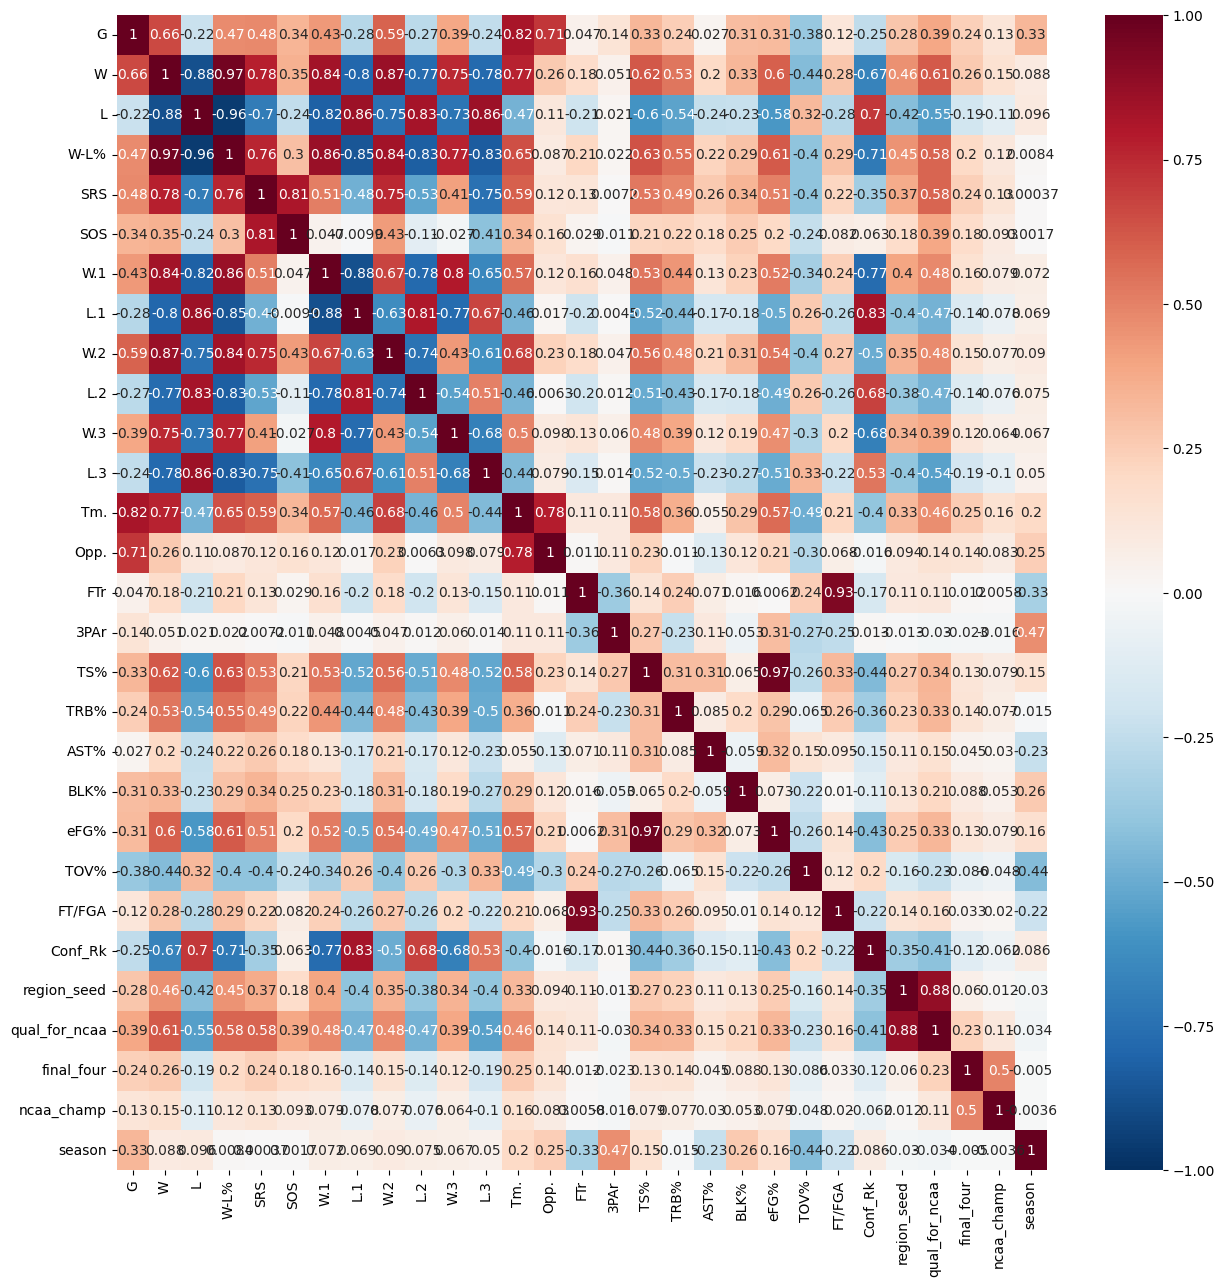

In [16]:
corr_df = raw_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_df, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()